Saving model_training.csv to model_training (3).csv


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0752 - mae: 0.2132
Epoch 1: val_loss improved from inf to 0.01726, saving model to daily_checkins.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 86ms/step - loss: 0.0747 - mae: 0.2125 - val_loss: 0.0173 - val_mae: 0.1134 - learning_rate: 0.0010
Epoch 2/50
34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0350 - mae: 0.1538
Epoch 2: val_loss improved from 0.01726 to 0.01577, saving model to daily_checkins.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0353 - mae: 0.1544 - val_loss: 0.0158 - val_mae: 0.1090 - learning_rate: 0.0010
Epoch 3/50
35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0341 - mae: 0.1517
Epoch 3: val_loss improved from 0.01577 to 0.01180, saving model to daily_checkins.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0343 - mae: 0.1520 - val_loss: 0.0118 - val_mae: 0.0953 - learning_rate: 0.0010
Epoch 4/50
34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0315 - mae: 0.1444
Epoch 4: val_loss improved

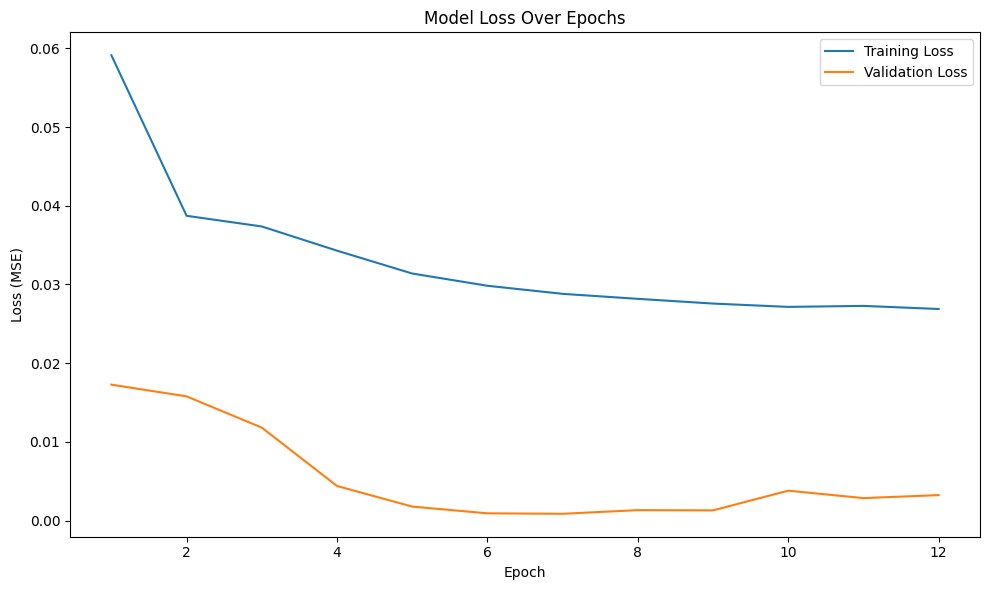

Final Validation Loss (MSE): 0.0032271011732518673
Final Validation MAE: 0.04873978719115257
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 335ms/step
R2 score:  0.8239451557819408
MAE:  24.195064655248668
MSE:  882.0957563948641
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4

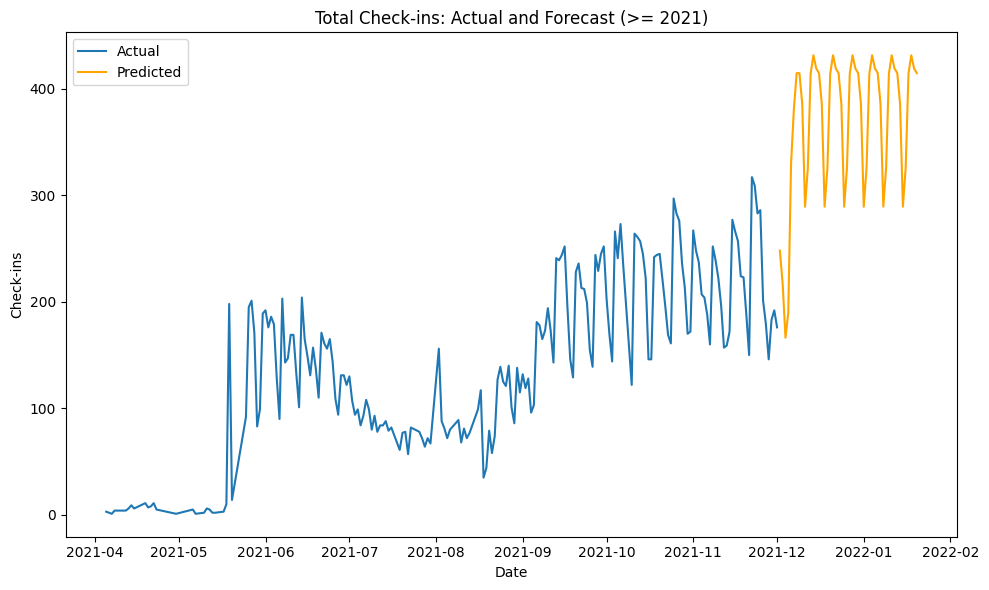

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import random
from google.colab import files
uploaded = files.upload()


# ------------------------------------------------------------------
# 1) REPRODUCIBILITY SETUP
# ------------------------------------------------------------------
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# ------------------------------------------------------------------
# 2) DATA LOADING & PREPROCESSING
# ------------------------------------------------------------------
path = 'model_training.csv'
df = pd.read_csv(path)
df['date_only'] = pd.to_datetime(df['date_only'])
df = df.sort_values('date_only')

# Drop columns we don't want
df = df.drop(['Hanze', 'RUG', 'Staff', 'daily_men_checkins', 'daily_women_checkins'], axis=1)

# One-hot encode categorical columns
categorical_cols = ['Weekday', 'Season', 'day_type']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Choose target and features
target_col = 'total_checkins_per_day'
feature_cols = [col for col in df_encoded.columns if col not in ['date_only', target_col]]

# Scale features and target
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()
features_scaled = feature_scaler.fit_transform(df_encoded[feature_cols])
target_scaled = target_scaler.fit_transform(df_encoded[[target_col]])

# Sliding window function
def create_sequences(features, target, window_size):
    X, y = [], []
    for i in range(len(features) - window_size):
        X.append(features[i:i+window_size])
        y.append(target[i+window_size])
    return np.array(X), np.array(y)

window_size = 7
X, y = create_sequences(features_scaled, target_scaled, window_size)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, shuffle=False, random_state=42
)

# ------------------------------------------------------------------
# 3) MODEL DEFINITION & TRAINING
# ------------------------------------------------------------------
checkpoint_cb = ModelCheckpoint(
    'daily_checkins.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

earlystop_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    mode='min',
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

model = Sequential([
    LSTM(32, activation=LeakyReLU(), input_shape=(X.shape[1], X.shape[2]), return_sequences=True),
    LSTM(32, activation=LeakyReLU(), dropout=0.25, recurrent_dropout=0.25, return_sequences=True),
    LSTM(32, activation=LeakyReLU(), dropout=0.17, recurrent_dropout=0.17, return_sequences=True),
    LSTM(32, activation=LeakyReLU(), return_sequences=True),
    LSTM(32, activation=LeakyReLU(), return_sequences=False),
    Dense(1)
])

model.compile(optimizer=RMSprop(), loss='mse', metrics=['mae'])

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=22,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint_cb, earlystop_cb, reduce_lr]
)

# ------------------------------------------------------------------
# 4) TRAINING LOSS PLOT
# ------------------------------------------------------------------
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history_df.index + 1

plt.figure(figsize=(10,6))
plt.plot(history_df["epoch"], history_df["loss"], label="Training Loss")
plt.plot(history_df["epoch"], history_df["val_loss"], label="Validation Loss")
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.tight_layout()
plt.show()

final_val_loss = history.history['val_loss'][-1]
final_val_mae  = history.history['val_mae'][-1]
print("Final Validation Loss (MSE):", final_val_loss)
print("Final Validation MAE:", final_val_mae)

# ------------------------------------------------------------------
# 5) TEST SET EVALUATION
# ------------------------------------------------------------------
y_pred = model.predict(X_test)
y_pred_original = target_scaler.inverse_transform(y_pred)
y_test_original = target_scaler.inverse_transform(y_test)

r2  = r2_score(y_test_original,  y_pred_original)
mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)

print('R2 score: ', r2)
print('MAE: ', mae)
print('MSE: ', mse)

# ------------------------------------------------------------------
# 6) MAKE FUTURE PREDICTIONS (50 DAYS)
# ------------------------------------------------------------------
future_predictions = []
future_dates = []

# Start from the last observed window
current_window = features_scaled[-window_size:].copy()
current_date = df['date_only'].iloc[-1]

for i in range(50):  # Modify here for however many days you want
    current_window_reshaped = np.expand_dims(current_window, axis=0)

    # Predict next day (scaled -> inverse transform)
    predicted_scaled   = model.predict(current_window_reshaped)
    predicted_checkins = target_scaler.inverse_transform(predicted_scaled)

    future_predictions.append(predicted_checkins[0, 0])
    future_dates.append(current_date + timedelta(days=1))

    # Shift date forward
    current_date += timedelta(days=1)
    weekday = current_date.strftime('%A')
    # For demonstration, we define "exam" on weekdays, "holiday" on weekends
    # (Adjust your logic as needed)
    if weekday in ['Saturday','Sunday']:
        day_type = 'holiday'
    else:
        day_type = 'exam'

    # Re-encode the next feature row
    next_feature_df = pd.DataFrame({
        'Weekday_' + weekday: [1],
        # We'll just pick a row in your DataFrame for Season, e.g. index=200
        'Season_' + df.loc[df.index[200], 'Season']: [1],
        'day_type_' + day_type: [1]
    })

    # Build a blank row that has all columns = 0
    next_feature_row = pd.DataFrame(
        np.zeros((1, len(feature_cols))),
        columns=feature_cols
    )
    # Fill in any columns that exist in next_feature_df
    for col in next_feature_df.columns:
        if col in next_feature_row.columns:
            next_feature_row[col] = next_feature_df[col].values[0]

    # Scale the next row
    next_feature_scaled = feature_scaler.transform(next_feature_row)

    # Slide the window forward
    current_window = np.vstack((current_window[1:], next_feature_scaled))

# Print a quick list of predictions
print("Future Predictions:")
for date, pred in zip(future_dates, future_predictions):
    print(f"{date.date()} predicted total check-ins: {pred:.2f}")

# ------------------------------------------------------------------
# 7) COMBINE HISTORICAL DATA + FUTURE PREDICTIONS INTO ONE LINE PLOT
# ------------------------------------------------------------------
# Create a DataFrame for the actual historical data
actual_df = df[['date_only', 'total_checkins_per_day']].copy()
actual_df.rename(columns={'total_checkins_per_day': 'checkins'}, inplace=True)

# Create a DataFrame for the predictions
pred_df = pd.DataFrame({
    'date_only': future_dates,
    'checkins': future_predictions
})

# --- SUODATA 2021-01-01 ALKAEN ---
actual_df_2021 = actual_df[actual_df['date_only'] >= '2021-01-01']
pred_df_2021   = pred_df[pred_df['date_only'] >= '2021-01-01']

# Piirretään
plt.figure(figsize=(10,6))

# Historiallinen data (sininen)
plt.plot(actual_df_2021['date_only'], actual_df_2021['checkins'], label='Actual')

# Ennuste (oranssi)
plt.plot(pred_df_2021['date_only'], pred_df_2021['checkins'], color='orange', label='Predicted')

plt.title('Total Check-ins: Actual and Forecast (>= 2021)')
plt.xlabel('Date')
plt.ylabel('Check-ins')
plt.legend()
plt.tight_layout()
plt.show()
